<a href="https://colab.research.google.com/github/Kimuksung/bigdata/blob/master/samsung_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!ls "/gdrive/My Drive/samsung"

mealData_meal_test.csv	mealData_meal_train2.csv


In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/My Drive/samsung/mealData_meal_train2.csv',engine='python',encoding='euc-kr', dtype={'trade_price_idx_value':'float'}) 
#/content/drive/My Drive/samsung/mealData_meal_test.csv
df2 = pd.read_csv('/content/drive/My Drive/samsung/mealData_meal_test.csv',engine='python',encoding='euc-kr', dtype={'trade_price_idx_value':'float'}) 

In [38]:
pd.to_datetime(df["SELL_DATE"]).dt.dayofweek.value_counts()
df['weekday'] = pd.to_datetime(df["SELL_DATE"]).dt.dayofweek
df=df[df['weekday']!= 5]

df2['weekday'] = pd.to_datetime(df2["SELL_DATE"]).dt.dayofweek
df2=df2[df2['weekday']!= 5]
df2.weekday.value_counts()

0    33550
1    31265
2    30818
4    25190
3    24160
Name: weekday, dtype: int64

In [39]:
train = df.groupby('SELL_DATE').sum()['QUANTITY']
test = df2.groupby('SELL_DATE').sum()['QUANTITY']
test

SELL_DATE
2019-05-27    3780
2019-05-28    3151
2019-05-29    3304
2019-05-30    3113
2019-05-31    2914
2019-06-03    3380
2019-06-04    3161
2019-06-05    2970
2019-06-07    1356
2019-06-10    3502
2019-06-11    3218
2019-06-12    3209
2019-06-13    2980
2019-06-14    3044
2019-06-17    3492
2019-06-18    3158
2019-06-19    3118
2019-06-20    3013
2019-06-21    2877
2019-06-24    3327
2019-06-25    3275
2019-06-26    3071
2019-06-27    2867
2019-06-28    3047
2019-07-01    3394
2019-07-02    3134
2019-07-03    3104
2019-07-04    3185
2019-07-05    2971
2019-07-08    3271
2019-07-09    3222
2019-07-10    3211
2019-07-11    2981
2019-07-12    3123
2019-07-15    3332
2019-07-16    3184
2019-07-17    2965
2019-07-18    3090
2019-07-19    3000
2019-07-22    3276
2019-07-23    3091
2019-07-24    3140
2019-07-25    3081
2019-07-26    3076
2019-07-29    3050
2019-07-30    2882
2019-07-31    2955
Name: QUANTITY, dtype: int64

In [0]:
a = list(set(df.SELL_DATE))
a.sort()
a
trainset ={'SELL_DATE': a , "QUANTITY":list(train)}
trainset = pd.DataFrame(trainset)
trainset['SELL_DATE'] = pd.to_datetime(trainset.SELL_DATE)
trainset.sort_values(by = ['SELL_DATE'], inplace=True, ascending=True)

a = list(set(df2.SELL_DATE))
a.sort()
a
testset ={'SELL_DATE': a , "QUANTITY":list(test)}
testset = pd.DataFrame(testset)
testset['SELL_DATE'] = pd.to_datetime(testset.SELL_DATE)
testset.sort_values(by = ['SELL_DATE'], inplace=True, ascending=True)
testset

In [41]:
mean = int(train.mean())
mean2 = int(test.mean())
train_holiday = ['2018-01-01','2018-02-15','2018-02-16','2018-03-01','2018-05-22','2018-06-06','2018-08-15',
           '2018-09-24','2018-09-25','2018-10-03','2018-10-09','2018-12-25','2019-01-01',
           '2019-02-04','2019-02-05','2019-02-06','2019-03-01']
test_holiday = ['2019-06-06']

temp = {"SELL_DATE": train_holiday , "QUANTITY":mean}
temp = pd.DataFrame(temp)
print(temp)
temp['SELL_DATE'] = pd.to_datetime(temp.SELL_DATE)
trainset = trainset.append(temp,ignore_index=True)
trainset.sort_values(by = ['SELL_DATE'], inplace=True, ascending=True)

temp2 = {"SELL_DATE":test_holiday , "QUANTITY":mean2}
temp2 = pd.DataFrame(temp2)
temp2['SELL_DATE'] = pd.to_datetime(temp2.SELL_DATE)
testset = testset.append(temp2,ignore_index=True)
testset.sort_values(by = ['SELL_DATE'], inplace=True, ascending=True)
testset


     SELL_DATE  QUANTITY
0   2018-01-01      3001
1   2018-02-15      3001
2   2018-02-16      3001
3   2018-03-01      3001
4   2018-05-22      3001
5   2018-06-06      3001
6   2018-08-15      3001
7   2018-09-24      3001
8   2018-09-25      3001
9   2018-10-03      3001
10  2018-10-09      3001
11  2018-12-25      3001
12  2019-01-01      3001
13  2019-02-04      3001
14  2019-02-05      3001
15  2019-02-06      3001
16  2019-03-01      3001


,SELL_DATE,QUANTITY
0,2019-05-27,3780
1,2019-05-28,3151
2,2019-05-29,3304
3,2019-05-30,3113
4,2019-05-31,2914
5,2019-06-03,3380
6,2019-06-04,3161
7,2019-06-05,2970
47,2019-06-06,3107
8,2019-06-07,1356


In [0]:
for i in train_holiday:
  print(i + str(trainset[trainset.SELL_DATE==i].QUANTITY))

2018-01-01342    3001
Name: QUANTITY, dtype: int64
2018-02-15343    3001
Name: QUANTITY, dtype: int64
2018-02-16344    3001
Name: QUANTITY, dtype: int64
2018-03-01345    3001
Name: QUANTITY, dtype: int64
2018-05-22346    3001
Name: QUANTITY, dtype: int64
2018-06-06347    3001
Name: QUANTITY, dtype: int64
2018-08-15348    3001
Name: QUANTITY, dtype: int64
2018-09-24349    3001
Name: QUANTITY, dtype: int64
2018-09-25350    3001
Name: QUANTITY, dtype: int64
2018-10-03351    3001
Name: QUANTITY, dtype: int64
2018-10-09352    3001
Name: QUANTITY, dtype: int64
2018-12-25353    3001
Name: QUANTITY, dtype: int64
2019-01-01354    3001
Name: QUANTITY, dtype: int64
2019-02-04355    3001
Name: QUANTITY, dtype: int64
2019-02-05356    3001
Name: QUANTITY, dtype: int64
2019-02-06357    3001
Name: QUANTITY, dtype: int64
2019-03-01358    3001
Name: QUANTITY, dtype: int64


In [42]:
trainset.set_index(trainset['SELL_DATE'],inplace=True)
trainset = trainset.drop(['SELL_DATE'],axis=1)
trainset

,QUANTITY
SELL_DATE,
2018-01-01,3001
2018-01-02,3146
2018-01-03,3112
2018-01-04,2936
2018-01-05,2760
...,...
2019-05-20,3626
2019-05-21,3417
2019-05-22,3248


In [43]:
testset.set_index(testset['SELL_DATE'],inplace=True)
testset = testset.drop(['SELL_DATE'],axis=1)
testset

,QUANTITY
SELL_DATE,
2019-05-27,3780
2019-05-28,3151
2019-05-29,3304
2019-05-30,3113
2019-05-31,2914
2019-06-03,3380
2019-06-04,3161
2019-06-05,2970
2019-06-06,3107


In [44]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 359 entries, 2018-01-01 to 2019-05-24
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   QUANTITY  359 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [45]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(trainset)
test_sc = sc.transform(testset)
train_sc

array([[0.7006705 ],
       [0.77011494],
       [0.75383142],
       [0.66954023],
       [0.58524904],
       [0.81561303],
       [0.73180077],
       [0.723659  ],
       [0.63362069],
       [0.69204981],
       [0.8414751 ],
       [0.76724138],
       [0.72126437],
       [0.63362069],
       [0.65277778],
       [0.87308429],
       [0.85344828],
       [0.85201149],
       [0.77203065],
       [0.71886973],
       [0.88793103],
       [0.7552682 ],
       [0.6637931 ],
       [0.6743295 ],
       [0.61206897],
       [0.88888889],
       [0.79310345],
       [0.75718391],
       [0.61733716],
       [0.62691571],
       [0.77538314],
       [0.58189655],
       [0.29501916],
       [0.7006705 ],
       [0.7006705 ],
       [0.62164751],
       [0.77059387],
       [0.73132184],
       [0.56226054],
       [0.58285441],
       [0.80555556],
       [0.64798851],
       [0.57854406],
       [0.7006705 ],
       [0.1901341 ],
       [0.84051724],
       [0.69923372],
       [0.634

In [46]:
trainse

,QUANTITY
SELL_DATE,
2018-01-01,3001
2018-01-02,3146
2018-01-03,3112
2018-01-04,2936
2018-01-05,2760
...,...
2019-05-20,3626
2019-05-21,3417
2019-05-22,3248


In [47]:

train_sc_df = pd.DataFrame(train_sc, columns=['QUANTITY'], index=trainset.index)
test_sc_df = pd.DataFrame(test_sc, columns=['QUANTITY'], index=testset.index)
train_sc_df.head()

,QUANTITY
SELL_DATE,
2018-01-01,0.700670
2018-01-02,0.770115
2018-01-03,0.753831
2018-01-04,0.669540
2018-01-05,0.585249


In [48]:
for s in range(1, 6):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['QUANTITY'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['QUANTITY'].shift(s)
train_sc_df.head(13)

,QUANTITY,shift_1,shift_2,shift_3,shift_4,shift_5
SELL_DATE,,,,,,
2018-01-01,0.700670,NaN,NaN,NaN,NaN,NaN
2018-01-02,0.770115,0.700670,NaN,NaN,NaN,NaN
2018-01-03,0.753831,0.770115,0.700670,NaN,NaN,NaN
2018-01-04,0.669540,0.753831,0.770115,0.700670,NaN,NaN
2018-01-05,0.585249,0.669540,0.753831,0.770115,0.700670,NaN
2018-01-08,0.815613,0.585249,0.669540,0.753831,0.770115,0.700670
2018-01-09,0.731801,0.815613,0.585249,0.669540,0.753831,0.770115
2018-01-10,0.723659,0.731801,0.815613,0.585249,0.669540,0.753831
2018-01-11,0.633621,0.723659,0.731801,0.815613,0.585249,0.669540


In [49]:

X_train = train_sc_df.dropna().drop('QUANTITY', axis=1)
y_train = train_sc_df.dropna()[['QUANTITY']]

X_test = test_sc_df.dropna().drop('QUANTITY', axis=1)
y_test = test_sc_df.dropna()[['QUANTITY']]



X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5
SELL_DATE,,,,,
2018-01-08,0.585249,0.669540,0.753831,0.770115,0.700670
2018-01-09,0.815613,0.585249,0.669540,0.753831,0.770115
2018-01-10,0.731801,0.815613,0.585249,0.669540,0.753831
2018-01-11,0.723659,0.731801,0.815613,0.585249,0.669540
2018-01-12,0.633621,0.723659,0.731801,0.815613,0.585249


In [50]:
y_train.head()

,QUANTITY
SELL_DATE,
2018-01-08,0.815613
2018-01-09,0.731801
2018-01-10,0.723659
2018-01-11,0.633621
2018-01-12,0.692050


In [51]:
print(type(X_train))
X_train = X_train.values
print(type(X_train))
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
#print(X_train)
print(y_train.shape)
#print(y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(354, 5)
(354, 1)


In [52]:
X_train_t = X_train.reshape(X_train.shape[0], 5, 1)
X_test_t = X_test.reshape(X_test.shape[0], 5, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(354, 5, 1)
[[[0.58524904]
  [0.66954023]
  [0.75383142]
  [0.77011494]
  [0.7006705 ]]

 [[0.81561303]
  [0.58524904]
  [0.66954023]
  [0.75383142]
  [0.77011494]]

 [[0.73180077]
  [0.81561303]
  [0.58524904]
  [0.66954023]
  [0.75383142]]

 ...

 [[0.89990421]
  [1.        ]
  [0.74090038]
  [0.86733716]
  [0.72222222]]

 [[0.81896552]
  [0.89990421]
  [1.        ]
  [0.74090038]
  [0.86733716]]

 [[0.7710728 ]
  [0.81896552]
  [0.89990421]
  [1.        ]
  [0.74090038]]]
[[0.81561303]
 [0.73180077]
 [0.723659  ]
 [0.63362069]
 [0.69204981]
 [0.8414751 ]
 [0.76724138]
 [0.72126437]
 [0.63362069]
 [0.65277778]
 [0.87308429]
 [0.85344828]
 [0.85201149]
 [0.77203065]
 [0.71886973]
 [0.88793103]
 [0.7552682 ]
 [0.6637931 ]
 [0.6743295 ]
 [0.61206897]
 [0.88888889]
 [0.79310345]
 [0.75718391]
 [0.61733716]
 [0.62691571]
 [0.77538314]
 [0.58189655]
 [0.29501916]
 [0.7006705 ]
 [0.7006705 ]
 [0.62164751]
 [0.77059387]
 [0.73132184]
 [0.56226054]
 [0.58285441]
 [0.80555556]
 [0.6479

In [53]:

from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model = Sequential() # Sequeatial Model 
model.add(LSTM(5, input_shape=(5, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [54]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100
354/354 [==============================] - 1s 1ms/step - loss: 0.3917
Epoch 2/100
354/354 [==============================] - 0s 100us/step - loss: 0.3063
Epoch 3/100
354/354 [==============================] - 0s 99us/step - loss: 0.2300
Epoch 4/100
354/354 [==============================] - 0s 99us/step - loss: 0.1647
Epoch 5/100
354/354 [==============================] - 0s 94us/step - loss: 0.1106
Epoch 6/100
354/354 [==============================] - 0s 95us/step - loss: 0.0705
Epoch 7/100
354/354 [==============================] - 0s 96us/step - loss: 0.0422
Epoch 8/100
354/354 [==============================] - 0s 100us/step - loss: 0.0265
Epoch 9/100
354/354 [==============================] - 0s 99us/step - loss: 0.0198
Epoch 10/100
354/354 [==============================] - 0s 104us/step - loss: 0.0180
Epoch 11/100
354/354 [==============================] - 0s 113us/step - loss: 0.0180
Epoch 12/100
354/354 [==============================] - 0s 107us/step - loss: 0.01

In [55]:
train_sc_df.describe()

,QUANTITY,shift_1,shift_2,shift_3,shift_4,shift_5
count,359.000000,358.000000,357.000000,356.000000,355.000000,354.000000
mean,0.700997,0.701143,0.700947,0.700615,0.700054,0.699207
std,0.138333,0.138500,0.138644,0.138698,0.138488,0.137759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.628592,0.627993,0.627395,0.627275,0.627155,0.627035
50%,0.700670,0.700670,0.700670,0.700670,0.700670,0.700670
75%,0.782567,0.782807,0.783046,0.782328,0.782088,0.781489
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.988985


Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

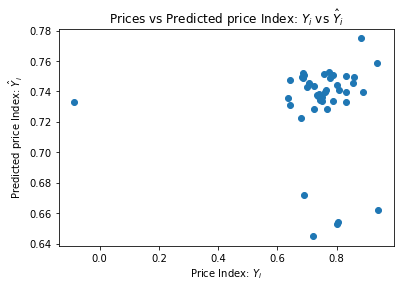

In [56]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test_t, batch_size=5)
plt.scatter(y_test, y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

In [136]:
answer = sc.inverse_transform(y_pred)
ans=answer - testset[5:]
import math
temp = []
for i in ans.QUANTITY:
  temp.append(math.sqrt(int(i)**2)/13)
temp = sum(temp) / len(temp)
temp

13.11985688729875